# Southern Ocean Thermocline Ventilation

In this notebook, we plot the Southern Ocean thermocline ventilation tracers as described in this paper:

https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016JC011680

### Import modules

In [1]:
# import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.cm as cmx
import matplotlib as mpl
# for label map
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# pyxpcm, xarray, dask
import numpy as np
import xarray as xr

### Load data

In [2]:
df = xr.open_dataset('../data_in/expose_tracer_histograms.nc', decode_times=False)
df

<xarray.Dataset>
Dimensions:            (ncoord: 2, nlat: 320, nlon: 2160, nsig1: 6, ntracer: 5, time: 438)
Coordinates:
    lat                (nlat, nlon) float64 ...
    lon                (nlat, nlon) float64 ...
    cn                 (ncoord) float64 ...
    tn                 (ntracer) float64 ...
  * time               (time) int32 0 0 0 0 0 0 0 0 ... 35 35 36 36 36 36 36 36
Dimensions without coordinates: ncoord, nlat, nlon, nsig1, ntracer
Data variables:
    sigma1             (nsig1) float64 ...
    tracer_hist        (ntracer, nlat, nlon) float64 ...
    montgomery         (nsig1, nlat, nlon) float64 ...
    release_locations  (ntracer, ncoord) float64 ...
    tracer_com         (ntracer, time, ncoord) float64 ...
Attributes:
    Conventions:          CF-1.6
    History:              Created 16-Mar-2021 14:49:17
    Source:               Compiled and prepared by D.C. Jones (British Antarc...
    Reference paper URL:  https://doi.org/10.1002/2016JC011680

#### Summed-up tracer distribution

In [3]:
df['tracer_one'] = df.tracer_hist.sum(dim='ntracer')

### Visualize tracer distributions

#### Tracer released in the Indian Ocean

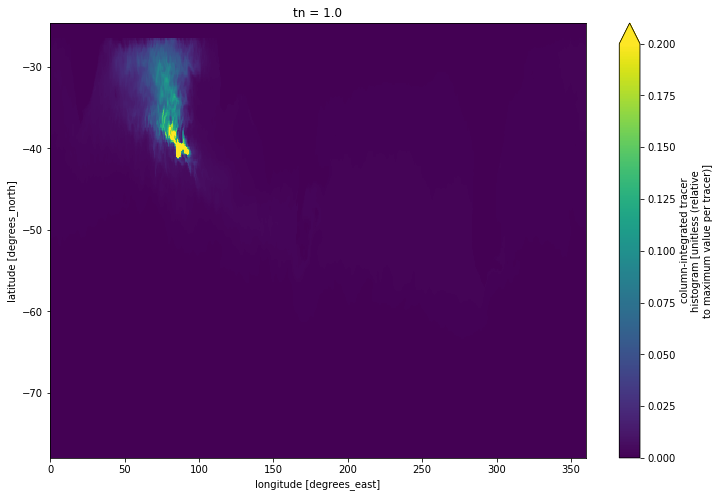

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
df.tracer_hist[0,:,:].plot(x='lon',y='lat',vmin=0.0,vmax=0.2)

#### Tracer released south of Australia

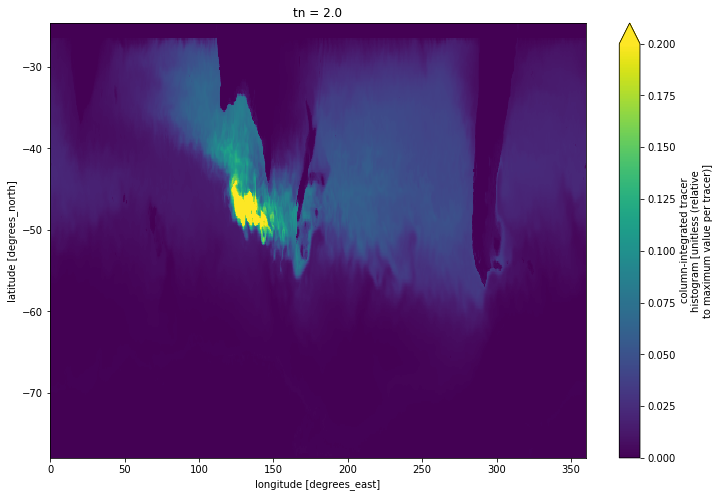

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
df.tracer_hist[1,:,:].plot(x='lon',y='lat',vmin=0.0,vmax=0.2)

#### Tracer released in the Central Pacific Ocean

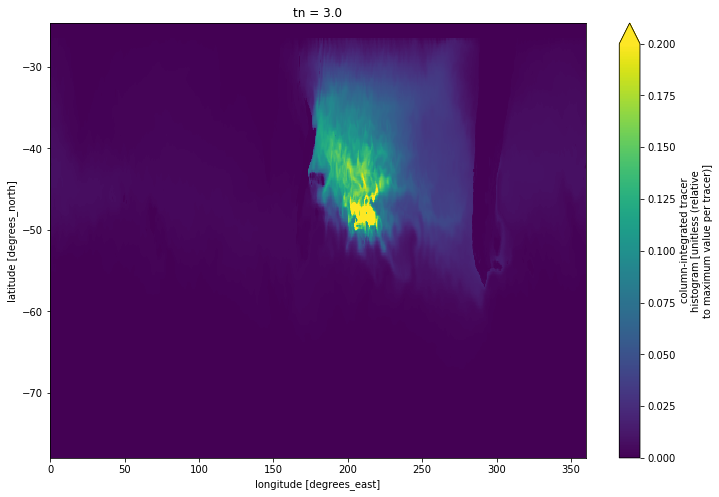

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
df.tracer_hist[2,:,:].plot(x='lon',y='lat',vmin=0.0,vmax=0.2)

#### Tracer released in the Eastern Pacific Ocean

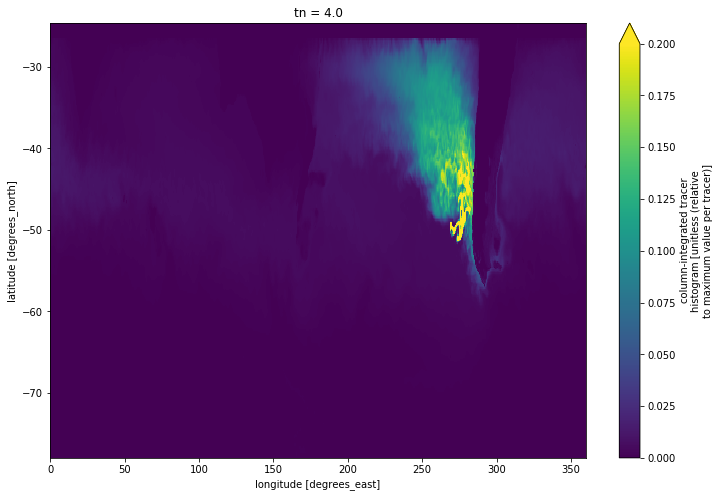

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
df.tracer_hist[3,:,:].plot(x='lon',y='lat',vmin=0.0,vmax=0.2)

#### Tracer released in the Atlantic Ocean

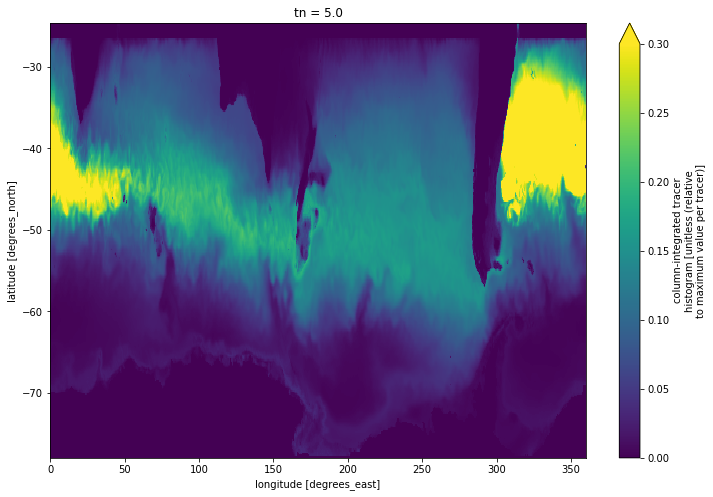

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
df.tracer_hist[4,:,:].plot(x='lon',y='lat',vmin=0.0,vmax=0.3)

### Combined: tracers from all five experiments

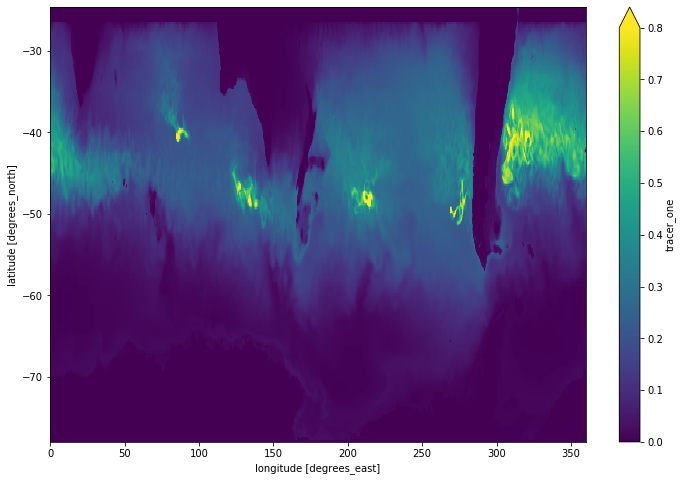

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
df.tracer_one.plot(x='lon',y='lat',vmin=0.0,vmax=0.8)

#### Montogmery potential plots

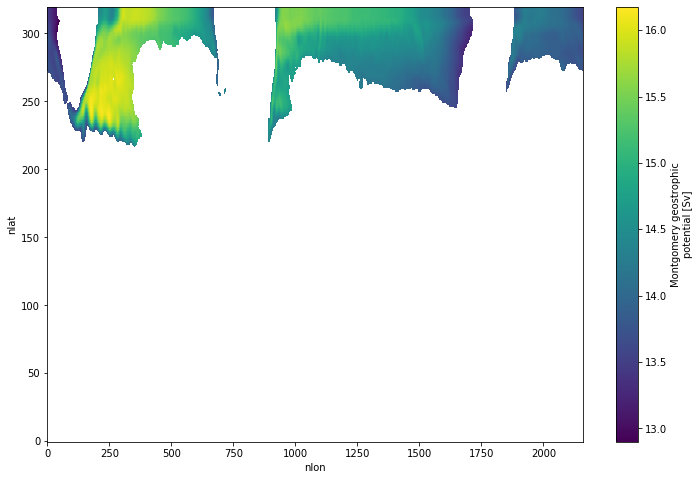

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
df.montgomery[0,:,:].plot()

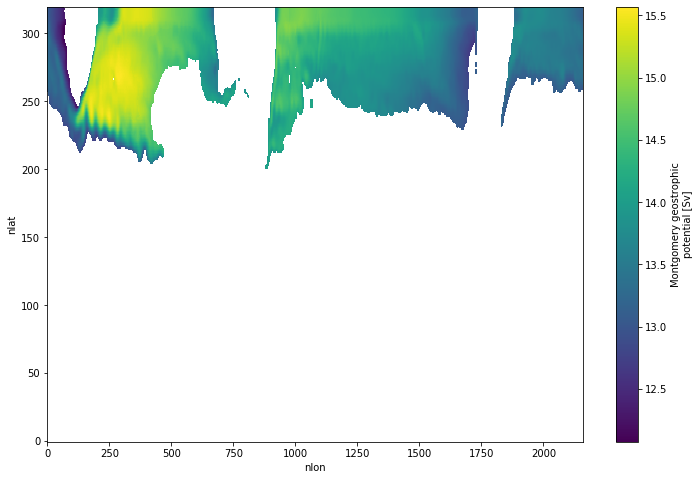

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
df.montgomery[1,:,:].plot()

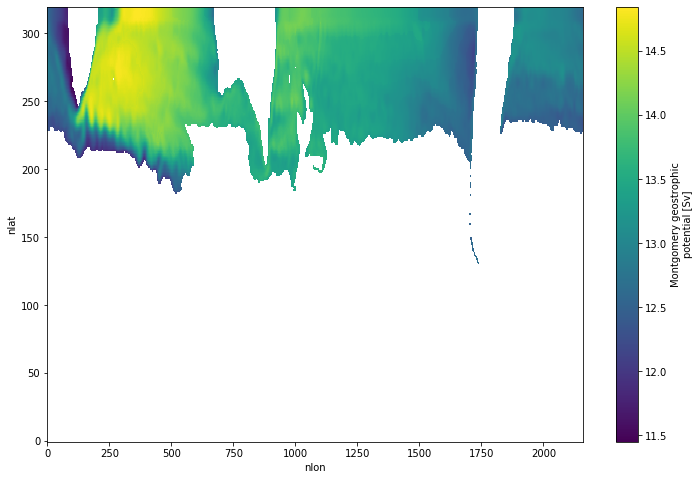

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
df.montgomery[2,:,:].plot()

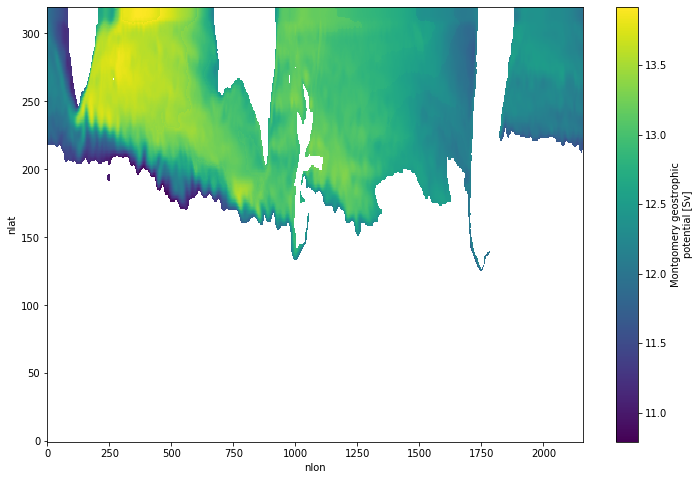

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
df.montgomery[3,:,:].plot()

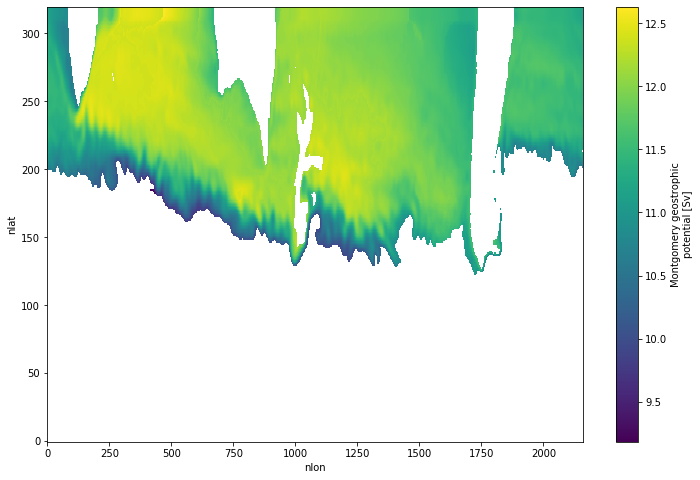

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
df.montgomery[4,:,:].plot()

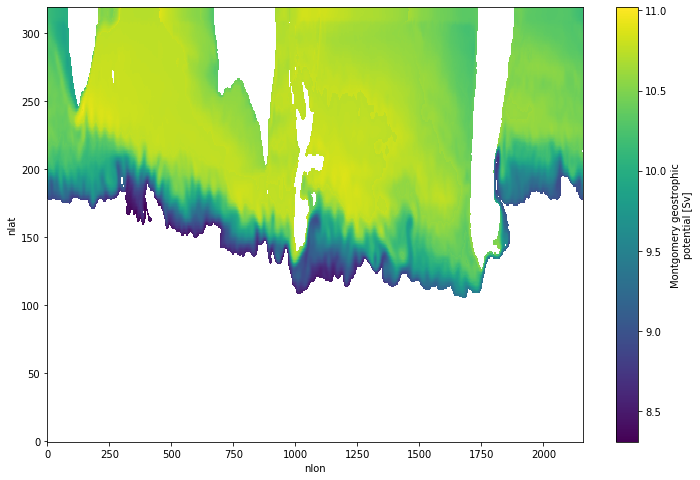

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
df.montgomery[5,:,:].plot()

### Combined tracer map 

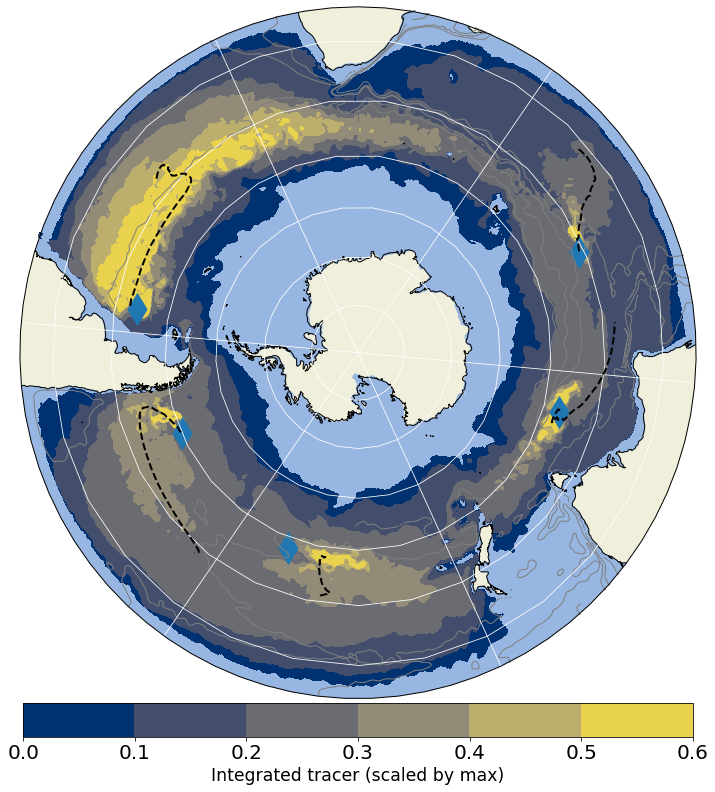

In [16]:
#prepare for masking arrays - 'conventional' arrays won't do it
y_values = np.ma.array(df.tracer_one.values)
#mask values below a certain threshold
y_values_masked = np.ma.masked_where(y_values < 0.05 , y_values)
y_values_masked[y_values_masked>0.6] = 0.6

#colormap with Historical data
plt.figure(figsize=(12, 15))

# set up axes
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=25.0))
ax.set_extent([-180, 180, -90, -25], ccrs.PlateCarree())

# contour plot: tracer pattern 
mylevs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
C1 = plt.contourf(df.lon,
                  df.lat,
                  y_values_masked,
                  transform=ccrs.PlateCarree(),
                  cmap=plt.cm.get_cmap('cividis'),
                  levels=mylevs,
                 )

# scatter plot: release locations
plt.scatter(df.release_locations[:,0]-360, 
            df.release_locations[:,1], 
            transform=ccrs.PlateCarree(),
            marker='d',
            s=500.0,
            )

# centre of mass
for ntrac in range(0,5,1):
    plt.plot(df.tracer_com[ntrac,0:120,0],
             df.tracer_com[ntrac,0:120,1],
             transform=ccrs.PlateCarree(),
             linestyle='dashed',
             color='black',
             linewidth=2)

# coastlines, gridlines
ax.coastlines(resolution='50m')
ax.gridlines(color='white')
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)

# plot contours: Montgomery potential
for nlev in range(1,5,1):
    plt.contour(df.lon, 
                df.lat,
                df.montgomery[nlev,:,:],
                [8.0, 10.0, 12.0, 14.0, 16.0],
                transform=ccrs.PlateCarree(),
                linewidths=1.0,
                linestyles='solid',
                colors='grey')

# circular boundary for map
theta = np.linspace(0, 2*np.pi, 80)
center, radius = [0.5, 0.5], 0.505
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# colorbar
cbar = plt.colorbar(C1, orientation="horizontal", pad=0.01, extend='max')
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Integrated tracer (scaled by max)', size='xx-large')

# adjust to where colorbar is same width as map
ax.set_aspect('auto', adjustable=None)

# save figure
plt.savefig('../plots/tracer_ventilation_pyplot.pdf')